# **Importing Libraries**

In this section, we import essential libraries for data analysis and visualization:

*   **pandas** for data manipulation and analysis.
*   **numpy** for numerical operations.

*  **matplotlib.pyplot** for creating static, animated, and interactive visualizations.

*   **seaborn** for statistical data visualization, providing an enhanced aesthetic for plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Accessing Google Sheets in Google Colab**

This section connects your Colab notebook to Google Sheets to fetch data:
*  **Authenticate** with Google account using auth.authenticate_user().
*  **Access Google Sheets** using gspread and Google credentials (default() and authorize()).

* Open the sheet named **"cancer patient data sets"** and fetch the data from the **"Sheet"** worksheet.
*   Convert the retrieved data into a **Pandas DataFrame** for analysis.

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
import gspread
from google.auth import default
creds, _ = default()

In [4]:
gc = gspread.authorize(creds)

In [5]:
worksheet = gc.open('cancer patient data sets').worksheet('Sheet')

In [6]:
data = worksheet.get_all_values()

In [7]:
df = pd.DataFrame(data[1:], columns=data[0])

In [8]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


# **Exploring the Dataset**
This section provides a summary of the dataset:


* **df.info():** displays a concise summary of the DataFrame, including column names, data types, and non-null counts, helping to assess data structure and completeness.
* **df.describe():** provides descriptive statistics for numerical columns, such as mean, standard deviation, min, and max values, offering insights into data distribution.



In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood        

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,40,2,8,8,8,8,7,7,7,...,8,8,8,8,8,9,7,7,7,3
top,P1,35,1,6,2,7,7,7,6,7,...,3,2,2,2,1,2,3,2,2,High
freq,1,77,598,326,202,405,365,327,308,296,...,212,280,243,240,221,240,230,251,300,365


# **Renaming Columns and Encoding Target Variable**


*   **Renaming Columns:** The column names are updated to meaningful labels to improve readability and understanding of the dataset's attributes.
*  **Encoding Target Variable:** The target column (level) is converted from categorical values ("Low", "Medium", "High") to numerical values (1, 2, 3) for easier analysis and modeling.



In [10]:
df.columns = [
    "patient_id", "age", "gender", "air_pollution", "alcohol_use",
    "dust_allergy", "occupational_hazards", "genetic_risk", "chronic_lung_disease",
    "balanced_diet", "obesity", "smoking", "passive_smoker", "chest_pain",
    "coughing_blood", "fatigue", "weight_loss", "shortness_breath", "wheezing",
    "swallowing_difficulty", "clubbing_finger_nails", "frequent_cold", "dry_cough",
    "snoring", "level"
]
df['level'] = df['level'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [11]:
df

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_breath,wheezing,swallowing_difficulty,clubbing_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


# **Data Visualization and Analysis**
This section uses visualizations to explore relationships and distributions in the dataset:
* **Distribution of Cancer Levels:** Visualizes the count of different cancer severity levels (Low, Medium, High) using a bar chart.

* **Cancer Levels by Gender:** Compares cancer severity levels across genders with a grouped bar chart.

* **Cancer Levels Across Age Groups:** Divides patients into predefined age groups and visualizes cancer severity levels within each group.

* **Correlation Heatmap:** Displays correlations between numerical variables in the dataset, highlighting relationships among features.

* **Alcohol Use by Age Group:** Examines the count of alcohol use among different age groups.

* **Average Air Pollution Levels Across Cancer Stages:** Visualizes average air pollution exposure for each cancer severity level using a bar chart.

* **Effect of Balanced Diet on Cancer Level:** Explores the relationship between balanced diet scores and cancer severity using a boxplot.

* **Average Obesity Levels Across Cancer Stages:** Shows average obesity levels for each cancer severity level using a bar chart.

* **Frequency of Symptoms Across Patients:** Summarizes the occurrence of various symptoms among all patients using a bar chart.



<ipython-input-12-b592f38921b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='level', palette='viridis')


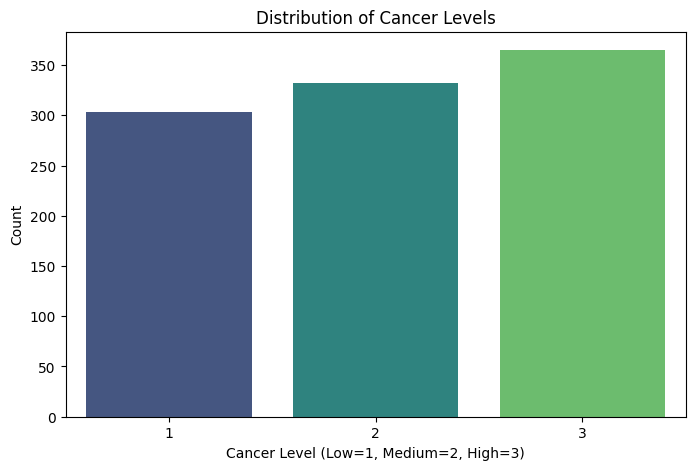

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='level', palette='viridis')
plt.title('Distribution of Cancer Levels')
plt.xlabel('Cancer Level (Low=1, Medium=2, High=3)')
plt.ylabel('Count')
plt.show()

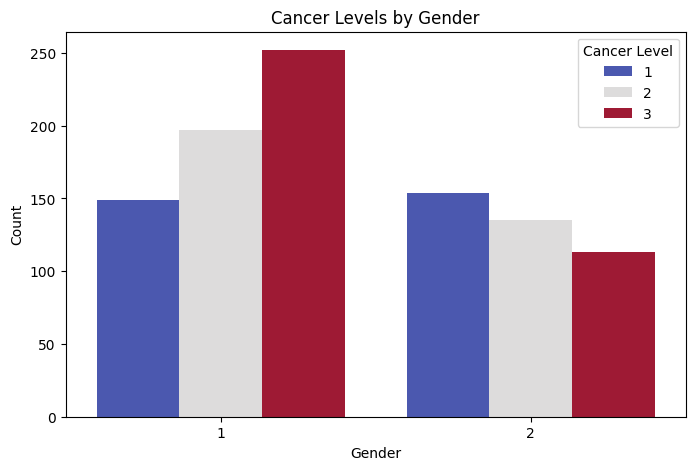

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='level', palette='coolwarm')
plt.title('Cancer Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cancer Level', loc='upper right')
plt.show()

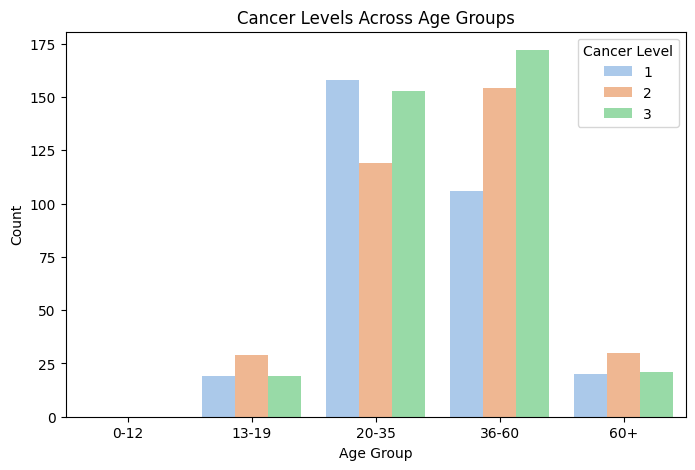

In [14]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')# Convert 'age' column to numeric, setting invalid entries to NaN

bins = [0, 12, 19, 35, 60, 120]  # Define age bins
labels = ['0-12', '13-19', '20-35', '36-60', '60+']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=pd.cut(df['age'], bins=bins, labels=labels),
              hue='level',
              palette='pastel'
              )
plt.title('Cancer Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cancer Level', loc='upper right')
plt.show()

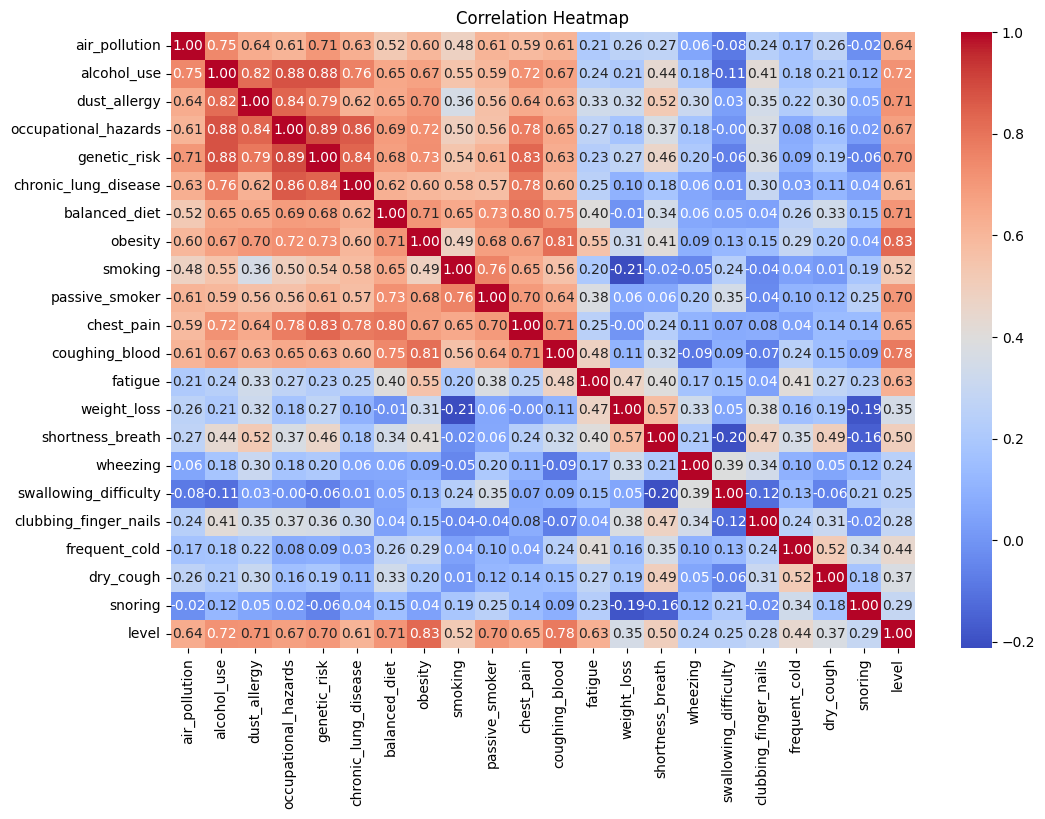

In [15]:
df_numeric = df.drop(['patient_id', 'age', 'gender'], axis=1).apply(pd.to_numeric)# Drop 'patient_id', 'age', 'gender' columns and convert remaining columns to numeric
correlation = df_numeric.corr()# Calculate the correlation matrix for the numeric columns in the DataFrame

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

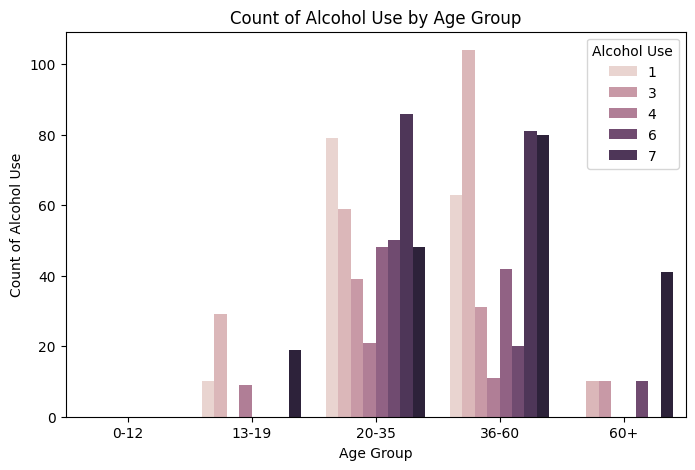

In [16]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['alcohol_use'] = pd.to_numeric(df['alcohol_use'], errors='coerce')

bins = [0, 12, 19, 35, 60, 120]
labels = ['0-12', '13-19', '20-35', '36-60', '60+']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=pd.cut(df['age'], bins=bins, labels=labels),
              hue='alcohol_use'
              )
plt.title('Count of Alcohol Use by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Alcohol Use')
plt.legend(title='Alcohol Use', loc='upper right')
plt.show()

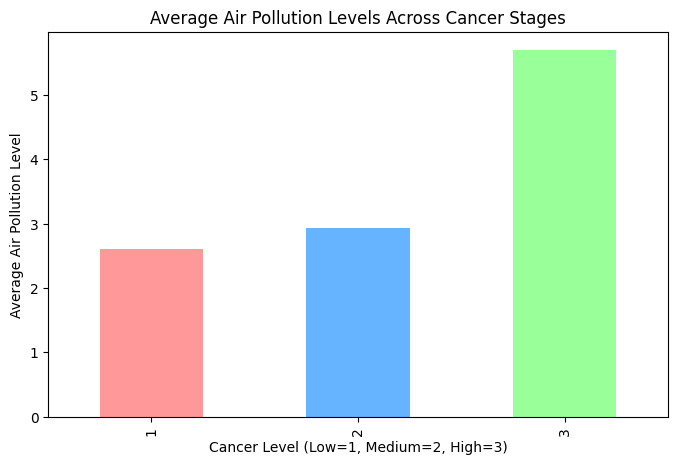

In [17]:
df['air_pollution'] = pd.to_numeric(df['air_pollution'], errors='coerce')
df['level'] = pd.to_numeric(df['level'], errors='coerce')

mean_air_pollution = df.groupby('level')['air_pollution'].mean()

mean_air_pollution.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'], figsize=(8, 5))
plt.title('Average Air Pollution Levels Across Cancer Stages')
plt.xlabel('Cancer Level (Low=1, Medium=2, High=3)')
plt.ylabel('Average Air Pollution Level')
plt.show()

<ipython-input-18-d36ab98881e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='balanced_diet', y='level', palette='dark')


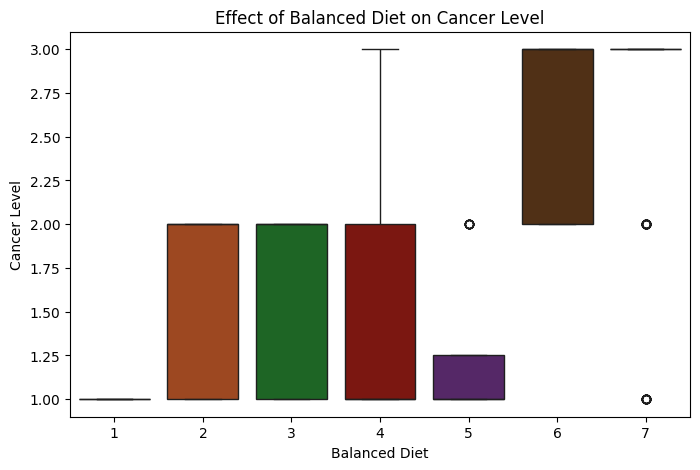

In [18]:
df['balanced_diet'] = pd.to_numeric(df['balanced_diet'], errors='coerce')
df['level'] = pd.to_numeric(df['level'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='balanced_diet', y='level', palette='dark')
plt.title('Effect of Balanced Diet on Cancer Level')
plt.xlabel('Balanced Diet')
plt.ylabel('Cancer Level')
plt.show()

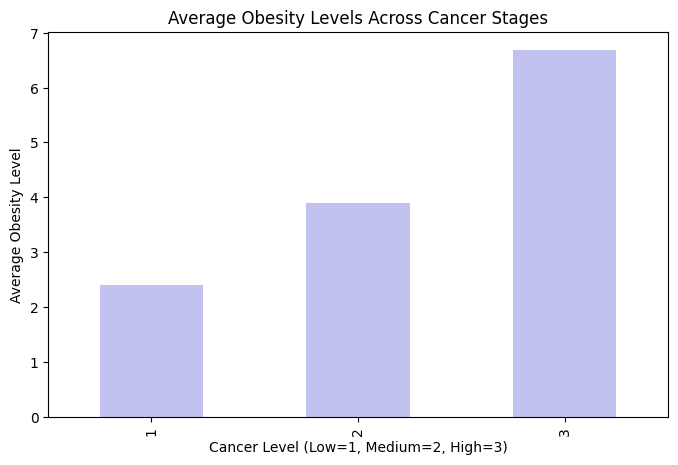

In [19]:
df['obesity'] = pd.to_numeric(df['obesity'], errors='coerce')
df['level'] = pd.to_numeric(df['level'], errors='coerce')

mean_obesity = df.groupby('level')['obesity'].mean()

mean_obesity.plot(kind='bar', figsize=(8, 5), color='#c2c2f0')
plt.title('Average Obesity Levels Across Cancer Stages')
plt.xlabel('Cancer Level (Low=1, Medium=2, High=3)')
plt.ylabel('Average Obesity Level')
plt.show()

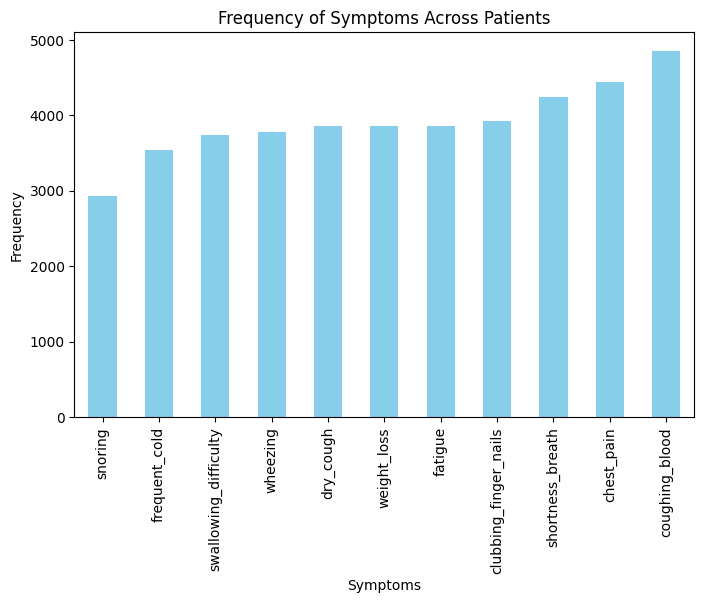

In [20]:
symptom_cols = [
    'chest_pain', 'coughing_blood', 'fatigue', 'weight_loss', 'shortness_breath',
    'wheezing', 'swallowing_difficulty', 'clubbing_finger_nails', 'frequent_cold',
    'dry_cough', 'snoring'
]

symptom_sum = df[symptom_cols].apply(pd.to_numeric).sum().sort_values()# Convert symptom columns to numeric and calculate the sum, then sort the values

plt.figure(figsize=(8, 5))
symptom_sum.plot(kind='bar', color='#87CEEB')
plt.title('Frequency of Symptoms Across Patients')
plt.ylabel('Frequency')
plt.xlabel('Symptoms')
plt.show()

# **Preprocessing the Dataset**
This section prepares the data for machine learning:
*  **Data Preprocessing:** A function (preprocess_data) is defined to encode categorical columns into numerical values using LabelEncoder.
* **Feature and Target Selection:** The dataset is split into features (X) and the target variable (y), excluding irrelevant columns such as patient_id.


In [21]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':  # Check for non-numeric columns
            df[column] = label_encoder.fit_transform(df[column])# Apply label encoding to the specified column to convert categorical values to numeric labels

    return df

# Feature and Target Selection
X = df.drop(columns=['patient_id', 'level'])  # Features
y = df['level']  # Target variable

# **Implementing and Evaluating Machine Learning Models**
This section builds and evaluates machine learning models to predict cancer severity levels:

* **K-Nearest Neighbors (KNN):**

* **Random Forest Classifier:**




In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report

# **1. Using KNN Algorithm:**
1. **Model Training and Prediction:**
  * The dataset is split (70% training, 30% testing), preprocessed, and a KNN model with 5 neighbors is trained.
  * Predictions are made on the test data.
2. **Evaluation and Metrics:**
  * The model is evaluated using accuracy, precision, recall, and a confusion matrix.
  * A detailed classification report and a heatmap of the confusion matrix are generated to visualize performance.


In [23]:
#Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess both training and testing data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

print(X_test.dtypes)

age                      int64
gender                   int64
air_pollution            int64
alcohol_use              int64
dust_allergy             int64
occupational_hazards     int64
genetic_risk             int64
chronic_lung_disease     int64
balanced_diet            int64
obesity                  int64
smoking                  int64
passive_smoker           int64
chest_pain               int64
coughing_blood           int64
fatigue                  int64
weight_loss              int64
shortness_breath         int64
wheezing                 int64
swallowing_difficulty    int64
clubbing_finger_nails    int64
frequent_cold            int64
dry_cough                int64
snoring                  int64
dtype: object


KNN Model Training Accuracy: 0.9986
KNN Model Testing Accuracy: 0.9967
KNN Model Evaluation:
Confusion Matrix:
[[ 83   1   0]
 [  0  97   0]
 [  0   0 119]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           2       0.99      1.00      0.99        97
           3       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



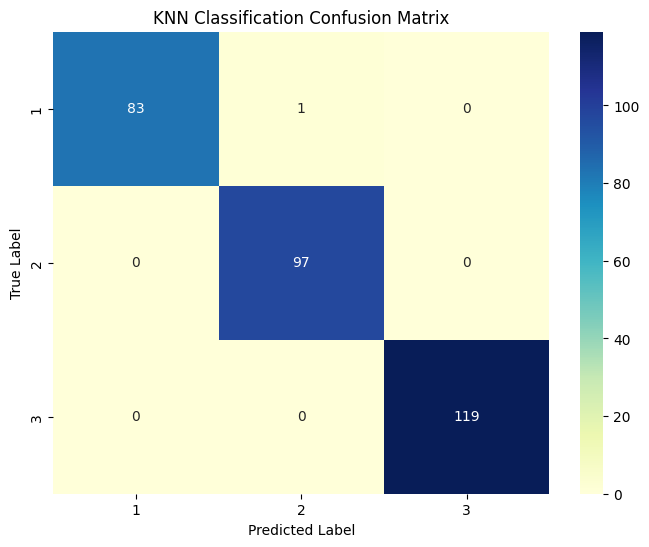

In [24]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Train the KNN model

# Predict on training data
y_train_pred = knn_model.predict(X_train)

# Predict on testing data
y_pred_knn = knn_model.predict(X_test)

# Metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Metrics for testing data
test_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')  # Use 'weighted' for multiclass data
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')

# Print Results
print(f"KNN Model Training Accuracy: {train_accuracy:.4f}")
print(f"KNN Model Testing Accuracy: {test_accuracy:.4f}")
print("KNN Model Evaluation:")
print("Confusion Matrix:")
knn_confusion = confusion_matrix(y_test, y_pred_knn)
print(knn_confusion)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='YlGnBu', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("KNN Classification Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **2. Using Random Forest Classifier:**
1. **Model Training and Prediction:**
  * The dataset is split (75% training, 25% testing), preprocessed, and a Random
 Forest model with 150 trees is trained.
  * Predictions are made on the test data.

2. **Evaluation and Metrics:**
  * The model is evaluated using accuracy, precision, recall, and a confusion matrix.
  * A detailed classification report and a heatmap of the confusion matrix are generated to assess performance.


In [25]:
#Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocess both training and testing data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

print(X_test.dtypes)

age                      int64
gender                   int64
air_pollution            int64
alcohol_use              int64
dust_allergy             int64
occupational_hazards     int64
genetic_risk             int64
chronic_lung_disease     int64
balanced_diet            int64
obesity                  int64
smoking                  int64
passive_smoker           int64
chest_pain               int64
coughing_blood           int64
fatigue                  int64
weight_loss              int64
shortness_breath         int64
wheezing                 int64
swallowing_difficulty    int64
clubbing_finger_nails    int64
frequent_cold            int64
dry_cough                int64
snoring                  int64
dtype: object


Random Forest Model Training Accuracy: 1.0000
Random Forest Model Testing Accuracy: 1.0000
Random Forest Model Evaluation:
Confusion Matrix:
[[ 66   0   0]
 [  0  80   0]
 [  0   0 104]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00       104

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



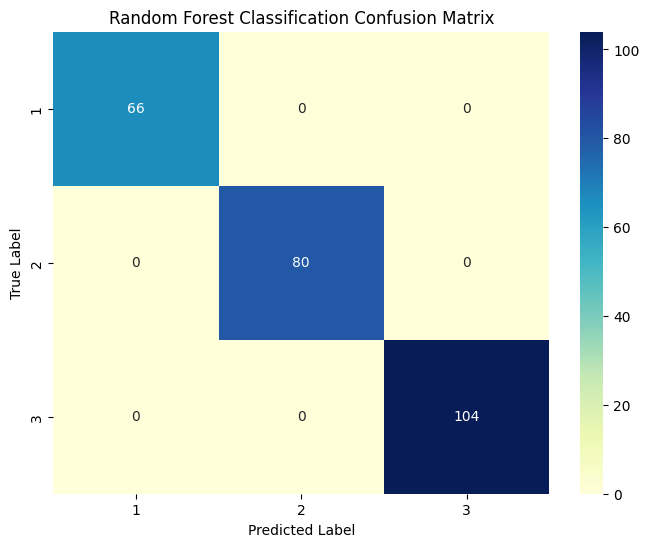

In [26]:
# Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(X_train, y_train)  # Train the Random Forest model

# Predict on training data
y_train_pred_rf = rf_model.predict(X_train)

# Predict on testing data
y_pred_rf = rf_model.predict(X_test)

# Metrics for training data
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)

# Metrics for testing data
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multiclass data
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

# Print Results
print(f"Random Forest Model Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Model Testing Accuracy: {rf_test_accuracy:.4f}")
print("Random Forest Model Evaluation:")
print("Confusion Matrix:")
rf_confusion = confusion_matrix(y_test, y_pred_rf)
print(rf_confusion)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='YlGnBu', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Random Forest Classification Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()